# Example of Continuous random variable

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [4]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 8.1 Normal distribution
- = Gaussian distribution
- ‚≠êÔ∏è Î≥ÄÌôòÌïú ÌôïÎ•† Î∂ÑÌè¨ÎèÑ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§ aX+ b ~ N(a * mean + b, a ** 2 * (std) ** 2 )
- Standard normal distribtionn : N ( 0, 1 )

In [5]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [6]:
mu, sigma  = 2, 0.5
X = N(mu, sigma)

In [7]:
check_prob(X)

expected vaue 2.000
variance 0.250


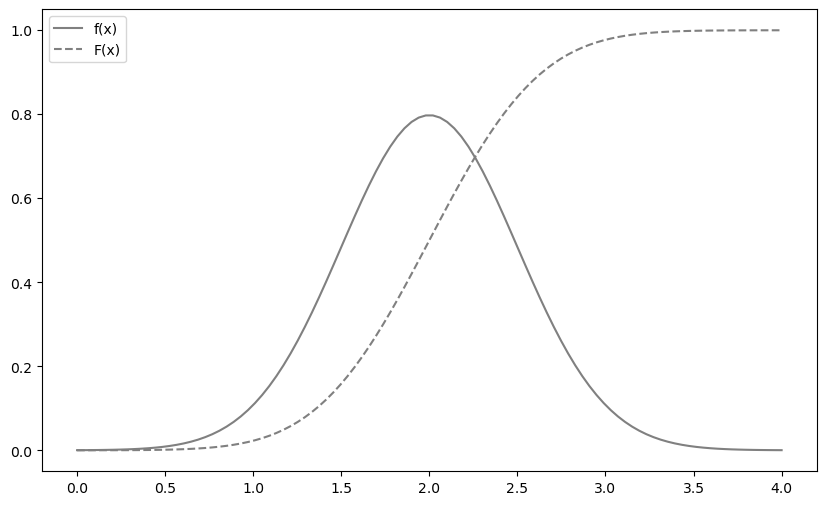

In [8]:
plot_prob(X, 0, 4) # range 0 to 4

In [9]:
rv = stats.norm(2, 0.5)
rv.mean(), rv.var()

(2.000, 0.250)

In [10]:
rv.pdf(2) # [P(X= 2) ÌôïÎ•†ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎã§ = density at 2, should be integrated  

0.798

In [11]:
rv.cdf(1.7)

0.274

In [12]:
# isf = upper 100a% point 
rv.isf(0.3)

2.262

In [13]:
rv.interval(0.9) # Ïù¥Í≤å Î≠ò ÏùòÎØ∏ÌïòÎäîÍ±∞ÏßÄ?

(1.178, 2.822)

In [14]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

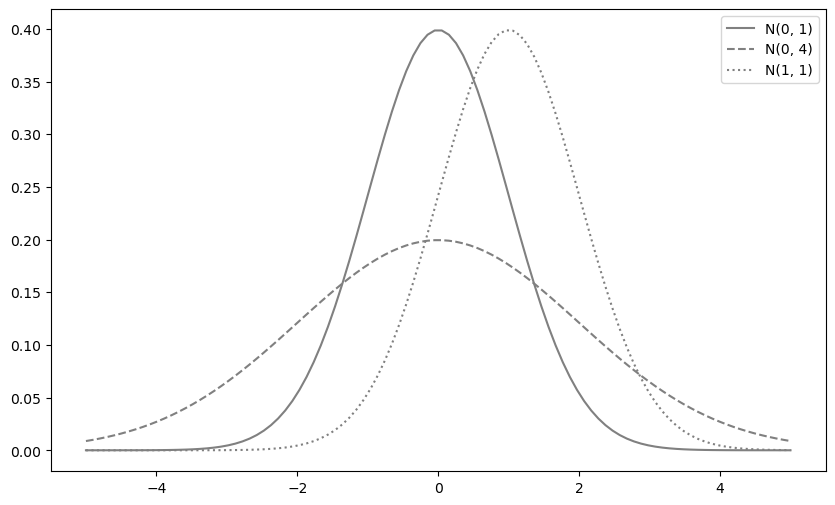

In [15]:
# sigma = wide distribution & mu = ÌèâÌñâÏù¥Îèô
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

Ïã§Ï†ú Ìï¥ÏÑù ÏòàÏãú
- Îç∞Ïù¥ÌÑ∞ 1,000Í∞ú Î™®ÏïÑÏÑú ÌèâÍ∑† = 170, ÌëúÏ§ÄÌé∏Ï∞® = 6 ‚Üí ÌÇ§ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú Í∑ºÏÇ¨.
- ‚ÄúÌèâÍ∑† ¬± 1œÉ ÏïàÏóê ÏïΩ 68%‚Äù, ‚Äú¬± 2œÉ ÏïàÏóê ÏïΩ 95%‚Äù, ‚Äú¬± 3œÉ ÏïàÏóê 99.7%‚Äù ‚Üí Ìï¥ÏÑù Í∞ÄÎä•.
- Ïù¥Î•º ÌôúÏö©Ìï¥ Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎÇò ÌäπÏ†ï Íµ¨Í∞ÑÏùò ÌôïÎ•† Ï∂îÏ†ïÏùÑ Ìï† Ïàò ÏûàÏùå.

## 8.2 Exponential distribution
- Ïñ¥Îñ§ ÏÇ¨Í±¥Ïù¥ Î∞úÏÉùÌïòÎäî Í∞ÑÍ≤©Ïù¥ Îî∞Î•¥Îäî Î∂ÑÌè¨
- eg. ÌïòÎ£®Îãπ ÌèâÍ∑† 2Í±¥Ïùò ÍµêÌÜµÏÇ¨Í≥†Í∞Ä Î∞úÏÉùÌïòÎäî ÏßÄÏó≠ÏóêÏÑú ÌïòÎ£® ÍµêÌÜµÏÇ¨Í≥† Î∞úÏÉù Í∞ÑÍ≤©
- eg. 1ÏãúÍ∞ÑÎãπ ÌèâÍ∑† 10Î≤à ÏóëÏÑ∏Ïä§ ÌïòÎäî ÏÇ¨Ïù¥Ìä∏Ïóê ÎåÄÌïú Ïï°ÏÑ∏Ïä§ Í∞ÑÍ≤©
- ÏßÄÏàòÎ∂ÑÌè¨Îäî Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ÏôÄ Í¥ÄÎ†®ÏÑ±Ïù¥ Í∞ïÌïú ÌôïÎ•†Î∂ÑÌè¨ 
    - Îã®ÏúÑ ÏãúÍ∞ÑÎãπ Î∞úÏÉùÌïòÎäî ÌöüÏàòÎ•º Îî∞Î•¥Îäî Í≤ÉÏù¥ Ìè¨ÏïÑÏÜ°
    - ÏÇ¨Í±¥ Î∞úÏÉù Í∞ÑÍ≤©Ïù¥ Îî∞Î•¥Îäî Í≤ÉÏù¥ ÏßÄÏàòÎ∂ÑÌè¨

üëâ ÏòàÏãú:

ÏΩúÏÑºÌÑ∞Ïóê 1ÏãúÍ∞Ñ ÎèôÏïà Ï†ÑÌôîÍ∞Ä Î™á Î≤à Ïò§ÎäîÏßÄ
Ïõπ ÏÑúÎ≤ÑÏóê 1Î∂Ñ ÎèôÏïà ÏöîÏ≤≠Ïù¥ Î™á Î≤à Îì§Ïñ¥Ïò§ÎäîÏßÄ

####
ÏΩúÏÑºÌÑ∞Ïóê Ï†ÑÌôîÎ•º Îã§ÏùåÏóê Î∞õÏùÑ ÎïåÍπåÏßÄ Í±∏Î¶¨Îäî ÏãúÍ∞Ñ
ÏÑúÎ≤ÑÏóê Îã§Ïùå ÏöîÏ≤≠Ïù¥ Îì§Ïñ¥Ïò§Í∏∞ÍπåÏßÄ Í±∏Î¶¨Îäî ÏãúÍ∞Ñ

In [16]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [17]:
lam = 3
X = Ex(lam)

In [18]:
check_prob(X)

expected vaue 0.333
variance 0.111


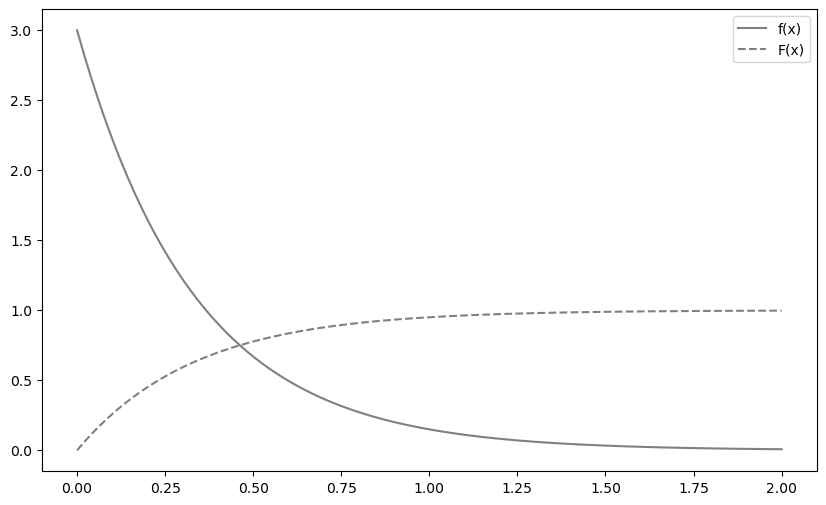

In [19]:
plot_prob(X, 0, 2)

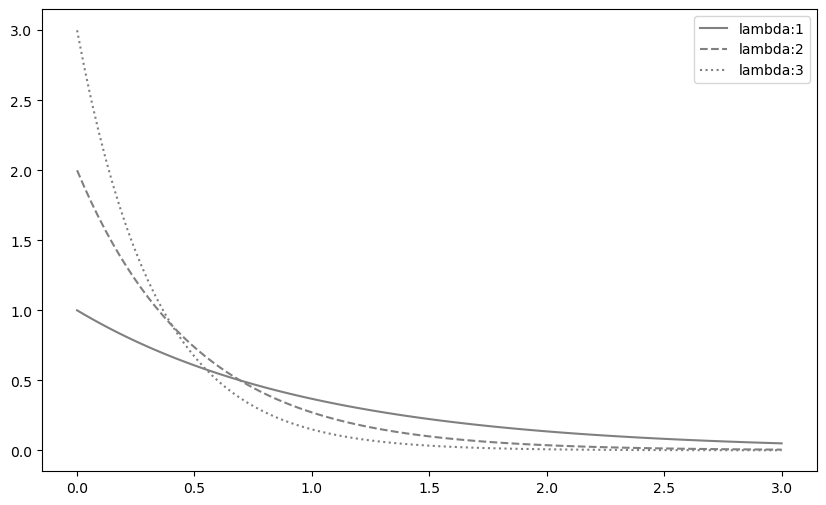

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 8.3 Chi-square distribution
- Î∂ÑÏÇ∞Ïùò Íµ¨Í∞Ñ Ï∂îÏ†ïÏù¥ÎÇò ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏóê ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•† Î∂ÑÌè¨
- ÏÑúÎ°ú ÎèÖÎ¶ΩÏù∏ Î≥µÏàòÏùò ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïóê ÏùòÌï¥ Ï†ïÏùò Îê®
####
- ÏûêÏú†ÎèÑÍ∞Ä nÏù∏ Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨ X ** 2(n) ÏúºÎ°ú ÌëúÍ∏∞Ìï©ÎãàÎã§. 

In [21]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# Random sampling 10 * 100 size form starndard normal distribution
Zs_sample = rv.rvs(((n, sample_size)))

chi2_sample = np.sum(Zs_sample**2, axis = 0)

- 10Í∞úÏùò ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨ Ï†úÍ≥±Ìï©Ïù¥ÎØÄÎ°ú, ÏûêÏú†ÎèÑÍ∞Ä 10Ïù∏ Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Í∞Ä ÎêúÎã§

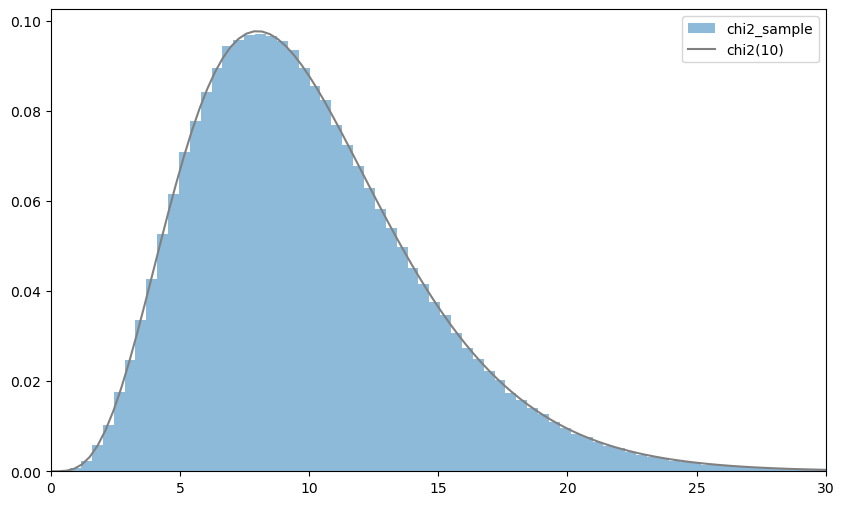

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n) # 10 degree of freedom 
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

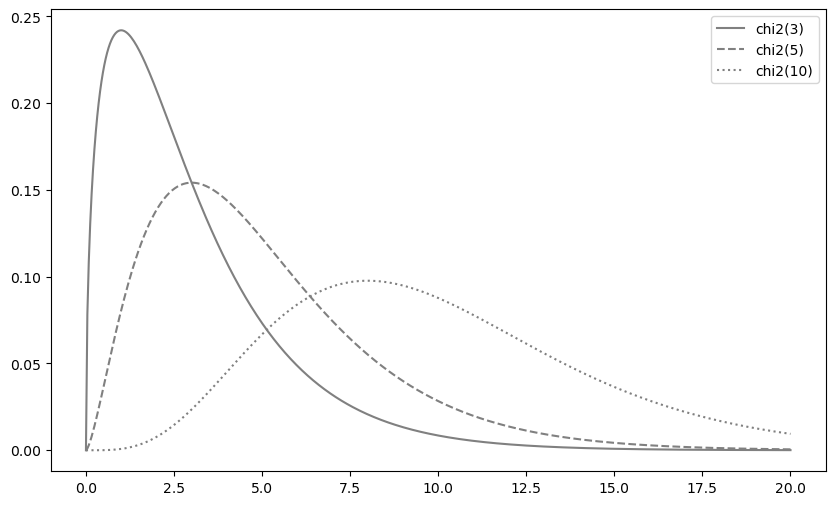

In [23]:
# Chagne degree of freedom 3, 5, 10 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

- Ï¢åÏö∞ ÎπÑÎåÄÏπ≠ÏúºÎ°ú, ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÍ≥†, Ïò§Î•∏Ï™ΩÏúºÎ°ú ÎÑìÏñ¥ÏßÑÎã§
- ÏûêÏú†ÎèÑÍ∞Ä Ïª§ÏßÄÎ©¥ Ï¢åÏö∞ÎåÄÏπ≠Ïóê Í∞ÄÍπåÏõåÏßÑÎã§
- ÏûêÏú†ÎèÑÏùò Í∞í Í∞ÄÍπåÏù¥Ïóê Î∂ÑÌè¨Ïùò Ï†ïÏ†êÏù¥ ÏûàÎã§

In [24]:
# freedom n's chi squre distribution upper 100a% : x2a(n)
rv = stats.chi2(5)
rv.isf(0.05)

11.070

## 8.4 T distribution
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú Î™®ÌèâÍ∑†Ïùò Íµ¨Í∞ÑÏ∂îÏ†ï Îì±Ïóê ÏÇ¨Ïö©ÌïòÎäî ÌôïÎ•† Î∂ÑÌè¨
- ÏÑúÎ°ú ÎèÖÎ¶ΩÏù∏ ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨ÏôÄ Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Ïóê ÏùòÌï¥ Ï†ïÏùòÌïúÎã§

In [25]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

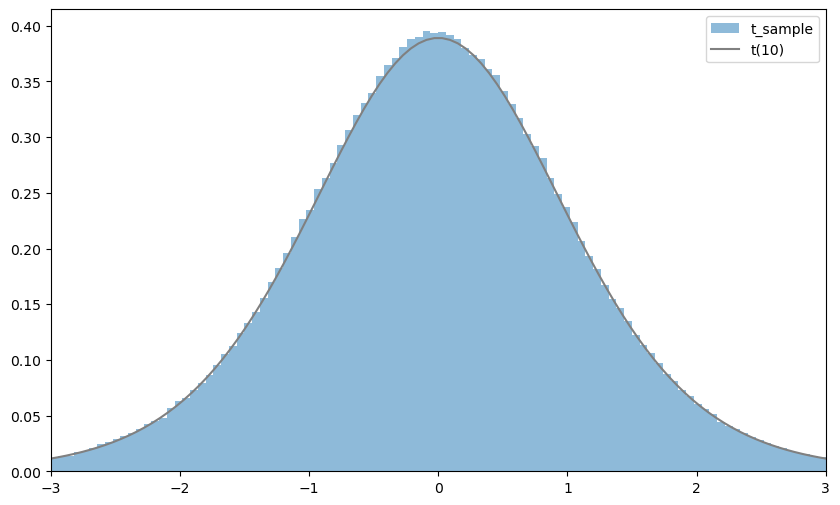

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

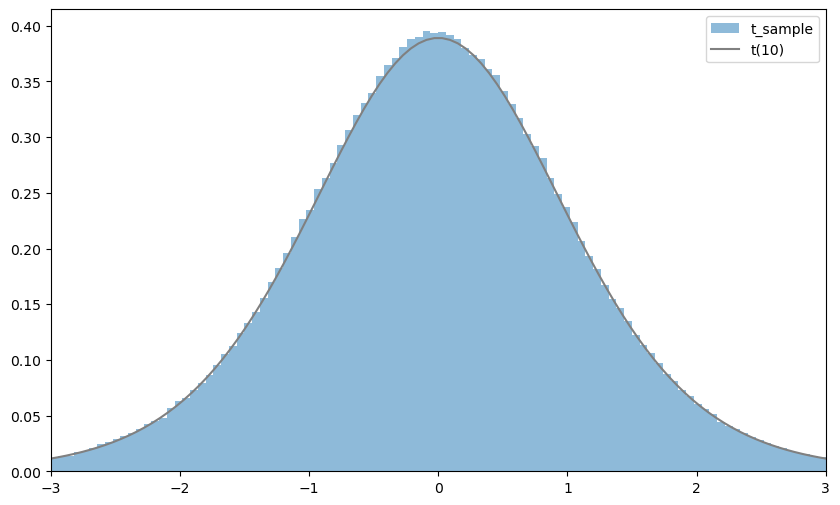

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n) # T function - followed t distribution
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

üìå tÎ∂ÑÌè¨Í∞Ä ÌïÑÏöîÌïú Ïù¥Ïú†

- ÌòÑÏã§ÏóêÏÑúÎäî **Î™®ÏßëÎã®Ïùò Î∂ÑÏÇ∞(œÉ¬≤)**ÏùÑ Î™®Î•¥Îäî Í≤ΩÏö∞Í∞Ä ÎåÄÎ∂ÄÎ∂ÑÏù¥ÏóêÏöî.
- Í∑∏ÎûòÏÑú ÌëúÎ≥∏ÏúºÎ°úÎ∂ÄÌÑ∞ Î∂ÑÏÇ∞ÏùÑ Ï∂îÏ†ïÌï¥Ïïº ÌïòÎäîÎç∞, Ïù¥Îïå Ï∂îÏ†ïÏπò ÎïåÎ¨∏Ïóê Î∂àÌôïÏã§ÏÑ±Ïù¥ Îçî Ïª§Ïßê.
- Ï†ïÍ∑úÎ∂ÑÌè¨ ÎåÄÏã† Ïù¥ Î∂àÌôïÏã§ÏÑ±ÏùÑ Î∞òÏòÅÌï¥Ï£ºÎäî Î∂ÑÌè¨Í∞Ä Î∞îÎ°ú tÎ∂ÑÌè¨ÏòàÏöî.

üìå ÏÇ¨Ïö©ÎêòÎäî ÎåÄÌëúÏ†ÅÏù∏ Í≤ΩÏö∞

- ÏûëÏùÄ ÌëúÎ≥∏Ïùº Îïå ÌèâÍ∑† Ï∂îÎ°†
Î™®ÏßëÎã® Î∂ÑÏÇ∞ÏùÑ Î™®Î•¥Îäî ÏÉÅÌô©ÏóêÏÑú ÌëúÎ≥∏ ÌèâÍ∑†Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞.
Ïòà: ‚ÄúÌïôÏÉù 10Î™ÖÏùò ÌÇ§ ÌèâÍ∑†ÏúºÎ°ú Ï†ÑÏ≤¥ ÌïôÏÉù ÌÇ§Ïùò ÌèâÍ∑†ÏùÑ Ï∂îÏ†ïÌï† Îïå‚Äù.

- t-Í≤ÄÏ†ï (t-test)
Ìïú ÏßëÎã® ÌèâÍ∑†Ïù¥ ÌäπÏ†ï Í∞íÍ≥º Îã§Î•∏ÏßÄ Í≤ÄÏ†ï (one-sample t-test)
Îëê ÏßëÎã® ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïúÏßÄ Í≤ÄÏ†ï (independent t-test, paired t-test)

- ÌöåÍ∑ÄÎ∂ÑÏÑù
ÌöåÍ∑ÄÍ≥ÑÏàò(Í∏∞Ïö∏Í∏∞, Ï†àÌé∏ Îì±)Í∞Ä Ïú†ÏùòÎØ∏ÌïúÏßÄ Í≤ÄÏ†ïÌï† ÎïåÎèÑ tÎ∂ÑÌè¨ ÏÇ¨Ïö©.

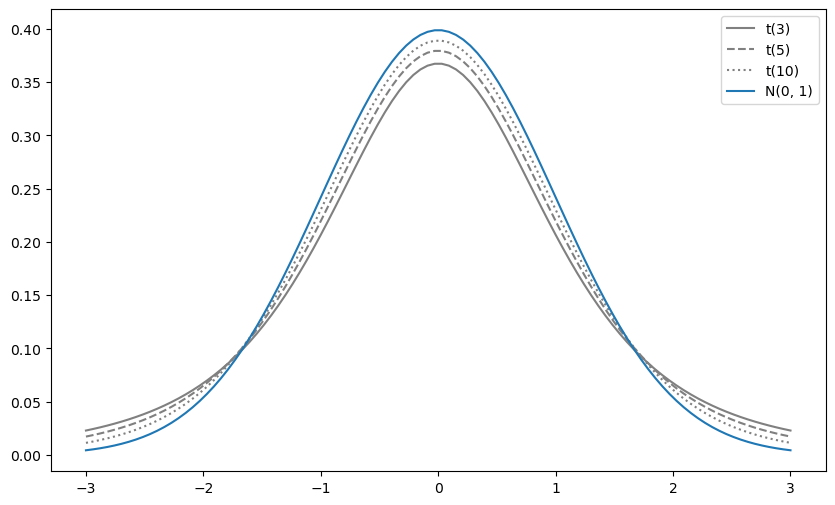

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

- Ï¢åÏö∞ÎåÄÏπ≠Ïù∏ Î∂ÑÌè¨
- ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ ÏñëÏ™Ω ÎÅùÏù¥ ÎëêÍ∫ºÏõÄ
- ÏûêÏú†ÎèÑÍ∞Ä Ïª§ÏßÄÎ©¥ ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏõåÏßê

In [29]:
rv = stats.t(5)
rv.isf(0.05)

2.015

# 8.5 F distribution

- Î∂ÑÏÇ∞Î∂ÑÏÑù Îì±ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•†Î∂ÑÌè¨Ïù¥Îã§
- ÏÑúÎ°ú ÎèÖÎ¶ΩÏù∏ ÎëêÍ∞úÏùò Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Ïóê ÏùòÌï¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÎê®

In [30]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

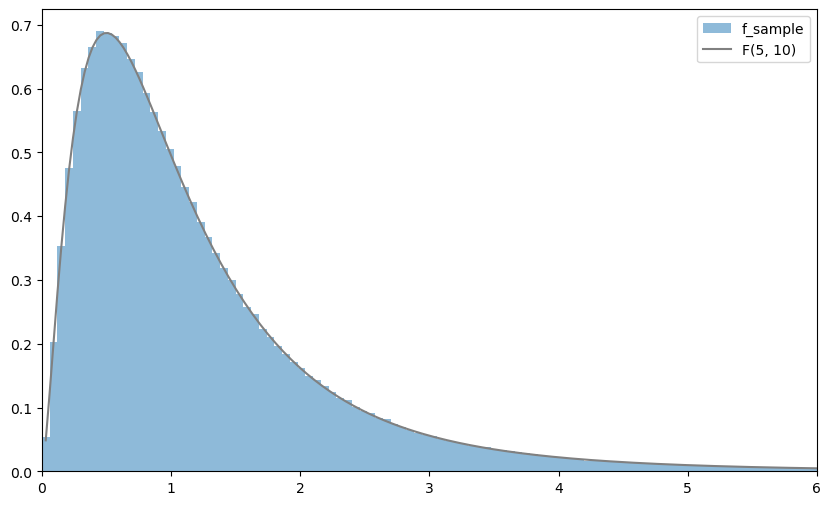

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2) # The degree of freedom
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

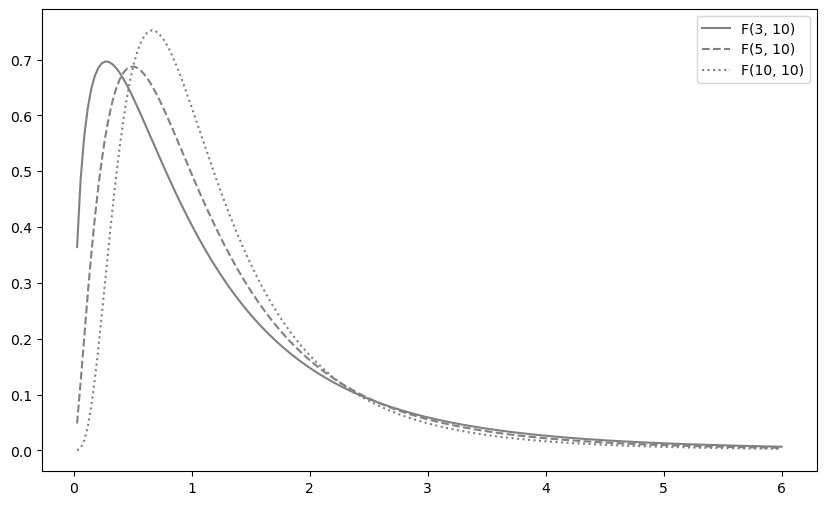

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

- Ï¢åÏö∞ ÎπÑÎåÄÏπ≠ÏúºÎ°ú ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÍ≥† Ïò§Î•∏Ï™ΩÏúºÎ°ú ÎÑìÏñ¥ÏßÄÎäî Î∂ÑÌè¨Ïù¥Îã§
- Î∂ÑÌè¨Ïùò Ï†ïÏ†êÏùÄ 1Ïóê Í∞ÄÍπùÎã§